In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	3
float64		column 3	24
int64		column 4	0
float64		column 5	9
float64		column 6	9
float64		column 7	3
float64		column 8	6
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,680.000000,659.000000,683.000000,674.000000,674.000000,680.000000,677.000000,683.000000
mean,4.442167,3.150000,3.197269,2.830161,3.234421,3.548961,3.442647,2.867061,1.603221
std,2.820761,3.064044,2.974143,2.864562,2.232065,3.647321,2.447614,3.050860,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

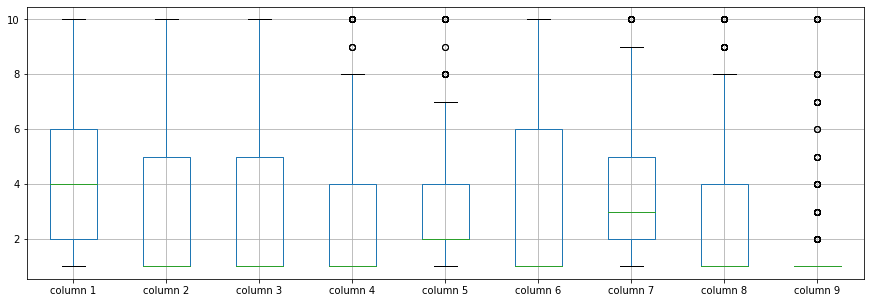

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.150000
column 3    3.197269
column 4    2.830161
column 5    3.234421
column 6    3.548961
column 7    3.442647
column 8    2.867061
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.642731,0.648859,0.487829,0.522654,0.591371,0.554125,0.531341,0.350957
column 2,0.642731,1.000000,0.903787,0.705324,0.752856,0.694368,0.754258,0.715226,0.459645
column 3,0.648859,0.903787,1.000000,0.680825,0.719314,0.712087,0.724697,0.712688,0.463286
column 4,0.487829,0.705324,0.680825,1.000000,0.592438,0.668329,0.666125,0.599835,0.418898
column 5,0.522654,0.752856,0.719314,0.592438,1.000000,0.582826,0.616475,0.623799,0.488668
column 6,0.591371,0.694368,0.712087,0.668329,0.582826,1.000000,0.682608,0.578732,0.341009
column 7,0.554125,0.754258,0.724697,0.666125,0.616475,0.682608,1.000000,0.659766,0.344486
column 8,0.531341,0.715226,0.712688,0.599835,0.623799,0.578732,0.659766,1.000000,0.436473
column 9,0.350957,0.459645,0.463286,0.418898,0.488668,0.341009,0.344486,0.436473,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+76,9+76+76,9+76+76,9+76+76+76+76,9+76+76+76,9+76+76,9+76,9], vae_layer = False, seed = 760)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.642596471877326
Epoch: 1 , loss: 36.14155392419724
Epoch: 2 , loss: 36.08303051903134
Epoch: 3 , loss: 34.522544860839844
Epoch: 4 , loss: 30.660098847888765
Epoch: 5 , loss: 29.97744996207101
Epoch: 6 , loss: 29.346119154067267
Epoch: 7 , loss: 29.263412611825125
Epoch: 8 , loss: 28.545771871294296
Epoch: 9 , loss: 27.870084626334055
Epoch: 10 , loss: 27.187746093386696
Epoch: 11 , loss: 27.152538254147483
Epoch: 12 , loss: 26.809282439095632
Epoch: 13 , loss: 26.333192507425945
Epoch: 14 , loss: 26.74583689371745
Epoch: 15 , loss: 25.33101531437465
Epoch: 16 , loss: 25.330882799057733
Epoch: 17 , loss: 24.628902821313766
Epoch: 18 , loss: 24.731601488022577
Epoch: 19 , loss: 25.976294426690963
Epoch: 20 , loss: 24.437037831261044
Epoch: 21 , loss: 24.7291122845241
Epoch: 22 , loss: 24.215811229887464
Epoch: 23 , loss: 24.19305254164196
Epoch: 24 , loss: 24.37452472959246
Epoch: 25 , loss: 23.989829

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
678,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
679,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
680,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
681,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(23.428804998316675, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.06986828181169548

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3,2.0,1.0,1.0,1.0,1


In [20]:
imputations[-1].to_excel("BCW_AN_1(imp).xlsx", index=False, header=False)